# Auto Reload

In [1]:
%load_ext autoreload
%autoreload 2

# Lib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Custom Libs
from utils import diff, check_stationality, yeo_johnson

plt.style.use('ggplot')
plt.rc('font', family='NanumGothic')


# Statistics

In [107]:
df = pd.read_csv('./prep_data.csv', encoding='cp949', index_col='Date')
df

,외국인_보유금액,외환보유액,FTSE,MSCI,외평채_2013,외평채_2014_04,외평채_2014_09,외평채_2015,외평채_2016,외평채_2019,...,국고채_3년,국고채_5년,국고채_10년,회사채_3년,CD,콜금리,기준금리,연준금리,AAII,VIX
Date,,,,,,,,,,,,,,,,,,,,,
200408월,165.6,1705.0,103.86,237.37,69.0,0.0,0.0,0.0,0.0,0.0,...,3.82,4.01,4.33,4.38,3.70,3.60,3.50,1.429,2.975,15.290
200409월,173.1,1745.0,107.45,245.87,75.0,0.0,97.0,0.0,0.0,0.0,...,3.59,3.75,4.14,4.10,3.52,3.52,3.50,1.605,15.940,13.340
200410월,171.3,1784.0,107.08,243.79,56.0,0.0,73.0,0.0,0.0,0.0,...,3.54,3.67,4.05,4.01,3.52,3.52,3.50,1.760,19.500,16.270
200411월,179.1,1926.0,111.54,252.75,62.0,0.0,85.0,0.0,0.0,0.0,...,3.42,3.53,3.96,3.86,3.42,3.34,3.25,1.932,34.900,13.240
200412월,179.7,1991.0,113.59,256.40,66.0,0.0,82.0,0.0,0.0,0.0,...,3.28,3.39,3.85,3.73,3.39,3.27,3.25,2.156,34.600,13.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202205월,695.3,4477.0,392.18,814.54,0.0,0.0,0.0,0.0,0.0,0.0,...,3.02,3.23,3.30,3.78,1.77,1.51,1.75,0.758,-27.175,26.190
202206월,593.0,4383.0,340.45,706.72,0.0,0.0,0.0,0.0,0.0,0.0,...,3.48,3.65,3.64,4.23,1.99,1.75,1.75,1.187,-26.960,28.709
202207월,629.9,4386.0,359.64,748.12,0.0,0.0,0.0,0.0,0.0,0.0,...,3.24,3.30,3.30,4.13,2.41,1.97,2.25,1.654,-19.500,21.330


In [108]:
## VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(df.values, col) for col in range(df.shape[1])]
vif['Feature'] = df.columns

vif = vif.sort_values(by='VIF_Factor', ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,Feature
0,50811.628601,FTSE
1,43556.425354,MSCI
2,15621.935851,국고채_5년
3,6252.046176,국고채_3년
4,4787.253885,국고채_10년
5,2831.916663,콜금리
6,2473.362920,외국인_보유금액
7,1895.491738,기준금리
8,1260.448135,CD
9,547.055854,외환보유액


In [109]:
out_lst, p_value_df = check_stationality(df=df)
p_value_df

정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.010,0.566,False
외환보유액,0.010,0.569,False
FTSE,0.010,0.297,False
MSCI,0.010,0.270,False
외평채_2013,0.010,0.171,False
외평채_2014_04,0.045,0.051,False
외평채_2014_09,0.010,0.137,False
외평채_2015,0.020,0.103,False
외평채_2016,0.010,0.525,False
외평채_2019,0.061,0.006,True


In [110]:
out_lst, _ = check_stationality(df=df)
df_diff3 = diff(df, out_lst, lag=3)
out_lst, p_value_df_diff3 = check_stationality(df_diff3)
p_value_df_diff3

정상성을 체크합니다
차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.100,0.002,True
외환보유액,0.100,0.005,True
FTSE,0.100,0.002,True
MSCI,0.100,0.002,True
외평채_2013,0.100,0.001,True
외평채_2014_04,0.100,0.000,True
외평채_2014_09,0.100,0.000,True
외평채_2015,0.100,0.000,True
외평채_2016,0.100,0.001,True
외평채_2019,0.057,0.006,True


In [111]:
out_lst, _ = check_stationality(df=df)
df_diff6 = diff(df, out_lst, lag=6)
out_lst, p_value_df_diff6 = check_stationality(df_diff6)
p_value_df_diff6

정상성을 체크합니다
차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.100,0.001,True
외환보유액,0.100,0.002,True
FTSE,0.100,0.003,True
MSCI,0.100,0.002,True
외평채_2013,0.100,0.003,True
외평채_2014_04,0.100,0.000,True
외평채_2014_09,0.100,0.000,True
외평채_2015,0.100,0.002,True
외평채_2016,0.100,0.003,True
외평채_2019,0.051,0.007,True


In [112]:
out_lst, _ = check_stationality(df=df)
df_diff9 = diff(df, out_lst, lag=9)
out_lst, p_value_df_diff9 = check_stationality(df_diff9)
p_value_df_diff9

정상성을 체크합니다
차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.100,0.004,True
외환보유액,0.100,0.001,True
FTSE,0.100,0.005,True
MSCI,0.100,0.005,True
외평채_2013,0.100,0.003,True
외평채_2014_04,0.100,0.001,True
외평채_2014_09,0.100,0.000,True
외평채_2015,0.100,0.000,True
외평채_2016,0.100,0.006,True
외평채_2019,0.047,0.007,False


In [113]:
out_lst, _ = check_stationality(df=df)
df_diff12 = diff(df, out_lst, lag=12)
out_lst, p_value_df_diff12 = check_stationality(df_diff12)
p_value_df_diff12

정상성을 체크합니다
차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.100,0.001,True
외환보유액,0.100,0.002,True
FTSE,0.100,0.001,True
MSCI,0.100,0.001,True
외평채_2013,0.100,0.019,True
외평채_2014_04,0.100,0.063,False
외평채_2014_09,0.100,0.002,True
외평채_2015,0.100,0.040,True
외평채_2016,0.100,0.071,False
외평채_2019,0.042,0.007,False


In [114]:
print(p_value_df_diff3['정상성_충족'].sum()/len(df.columns))
print(p_value_df_diff6['정상성_충족'].sum()/len(df.columns))
print(p_value_df_diff9['정상성_충족'].sum()/len(df.columns))
print(p_value_df_diff12['정상성_충족'].sum()/len(df.columns))

0.7777777777777778
0.8148148148148148
0.7777777777777778
0.5925925925925926


# Yeo-Johnson

In [115]:
df = pd.read_csv('./prep_data.csv', encoding='cp949', index_col='Date')
out_lst, _ = check_stationality(df=df)
df_boxcox = yeo_johnson(df, out_lst)
out_lst, p_value_df_boxcox = check_stationality(df_boxcox)
p_value_df_boxcox

정상성을 체크합니다
Yeo-Johnson 변환을 실시합니다. 
변환 대상 : ['외국인_보유금액', '외환보유액', 'FTSE', 'MSCI', '외평채_2013', '외평채_2014_04', '외평채_2014_09', '외평채_2015', '외평채_2016', '외평채_2023', '외평채_2024', '외평채_2027', '외평채_2028', '외평채_2029', '외평채_2044', '외평채_2048', '국고채_3년', '국고채_5년', '국고채_10년', '회사채_3년', 'CD', '콜금리', '기준금리', '연준금리']
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.010,0.406,False
외환보유액,0.010,0.590,False
FTSE,0.010,0.197,False
MSCI,0.010,0.178,False
외평채_2013,0.010,0.756,False
외평채_2014_04,0.044,0.500,False
외평채_2014_09,0.010,0.648,False
외평채_2015,0.010,0.556,False
외평채_2016,0.010,0.643,False
외평채_2019,0.061,0.006,True


# Yeo-Jonhson After Diff

In [116]:
df = pd.read_csv('./prep_data.csv', encoding='cp949', index_col='Date')
out_lst, _ = check_stationality(df=df)

diff_df = diff(df, out_lst, lag=6)
df_boxcox = yeo_johnson(diff_df, out_lst)
out_lst, p_value_df_boxcox = check_stationality(df_boxcox)
p_value_df_boxcox

정상성을 체크합니다
차분을 통해 계절성과 정상성을 제거합니다.
Yeo-Johnson 변환을 실시합니다. 
변환 대상 : ['외국인_보유금액', '외환보유액', 'FTSE', 'MSCI', '외평채_2013', '외평채_2014_04', '외평채_2014_09', '외평채_2015', '외평채_2016', '외평채_2023', '외평채_2024', '외평채_2027', '외평채_2028', '외평채_2029', '외평채_2044', '외평채_2048', '국고채_3년', '국고채_5년', '국고채_10년', '회사채_3년', 'CD', '콜금리', '기준금리', '연준금리']
정상성을 체크합니다


,KPSS,ADF,정상성_충족
외국인_보유금액,0.100,0.001,True
외환보유액,0.100,0.002,True
FTSE,0.100,0.003,True
MSCI,0.100,0.002,True
외평채_2013,0.100,0.004,True
외평채_2014_04,0.100,0.000,True
외평채_2014_09,0.100,0.000,True
외평채_2015,0.100,0.003,True
외평채_2016,0.100,0.003,True
외평채_2019,0.051,0.007,True


In [117]:
print(p_value_df_boxcox['정상성_충족'].sum())

19


# Trial #1 PCA

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./prep_data.csv', encoding='cp949', index_col='Date')

SPLIT = 10

X_train = df.iloc[:-SPLIT, 1:]
X_test = df.iloc[-SPLIT:, 1:]

y_train = df.iloc[:-SPLIT, 0]
y_test = df.iloc[-SPLIT:, 0]


## Scaling 
for col in X_train.columns :
    ss = StandardScaler()
    X_train[col] = ss.fit_transform(X_train[[col]])
    X_test[col] = ss.transform(X_test[[col]])

ss = StandardScaler()
y_train = ss.fit_transform(y_train.values.reshape(-1, 1))
y_test = ss.transform(y_test.values.reshape(-1, 1))

pca_obj1 = ['외환보유액','FTSE','MSCI']
pca_obj2 = ['외평채_2013','외평채_2014_04','외평채_2014_09','외평채_2015','외평채_2016','외평채_2019']
pca_obj3 = ['외평채_2023','외평채_2024','외평채_2027','외평채_2028','외평채_2029','외평채_2044','외평채_2048']
pca_obj4 = ['국고채_3년', '국고채_5년', '국고채_10년','회사채_3년']
pca_obj5 = ['CD', '콜금리', '기준금리']

obj_lst_n_1 = [pca_obj1, pca_obj4, pca_obj5]

pca_X_train = pd.DataFrame()
pca_X_test = pd.DataFrame()

## 축 1개로도 90% 넘게 설명 가능한 변수들 압축
for idx, objects in enumerate(obj_lst_n_1) :        
    pca = PCA(n_components=1)
    pcaed = pca.fit_transform(X_train[objects])
    pcaed_df = pd.DataFrame(pcaed, columns = [f'PCA_{idx}'])
    print(f'✅ PCA_{idx}의 설명력 {pca.explained_variance_ratio_}')
    pca_X_train = pd.concat([pca_X_train, pcaed_df], axis=1)
    
    pcaed_test = pca.transform(X_test[objects])
    pcaed_test_df = pd.DataFrame(pcaed_test, columns = [f'PCA_TEST_{idx}'])
    pca_X_test = pd.concat([pca_X_test, pcaed_test_df], axis=1)

pca_X_train.columns = ['투자지수', '국고채관련', '금리관련']
pca_X_test.columns = ['투자지수', '국고채관련', '금리관련']

## 과거 외평채 압축
pca2 = PCA(n_components=2)
pcaed2 = pca2.fit_transform(X_train[pca_obj2])
pcaed2_df = pd.DataFrame(pcaed2, columns =['과거_외평채_1', '과거_외평채_2'])
pcaed_test = pca2.transform(X_test[pca_obj2])
pcaed_test_df = pd.DataFrame(pcaed_test, columns =['과거_외평채_1', '과거_외평채_2'])

pca_X_train = pd.concat([pca_X_train, pcaed2_df], axis=1)
pca_X_test = pd.concat([pca_X_test, pcaed_test_df], axis=1)

print(f'✅ 과거 외평채 압축 변수의 설명력 {sum(pca2.explained_variance_ratio_)}')

## 미래 외평채 압축
pca3 = PCA(n_components=3)
pcaed3 = pca3.fit_transform(X_train[pca_obj3])
pcaed3_df = pd.DataFrame(pcaed3, columns =['미래_외평채_1', '미래_외평채_2', '미래_외평채_3'])
pcaed_test = pca3.transform(X_test[pca_obj3])
pcaed_test_df = pd.DataFrame(pcaed_test, columns =['미래_외평채_1', '미래_외평채_2', '미래_외평채_3'])

pca_X_train = pd.concat([pca_X_train, pcaed3_df], axis=1)
pca_X_test = pd.concat([pca_X_test, pcaed_test_df], axis=1)

pca_X_train.index = X_train.index
pca_X_test.index = X_test.index

print(f'✅ 미래 외평채 압축 변수의 설명력 {sum(pca3.explained_variance_ratio_)}')
pca_X_train


✅ PCA_0의 설명력 [0.95832035]
✅ PCA_1의 설명력 [0.97443849]
✅ PCA_2의 설명력 [0.99367322]
✅ 과거 외평채 압축 변수의 설명력 0.9381292413258056
✅ 미래 외평채 압축 변수의 설명력 0.9354900720680199


,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3
Date,,,,,,,,
200408월,-3.436100,1.086016,1.419392,-1.282598,0.488632,-1.378295,-0.580920,0.075974
200409월,-3.348098,0.756313,1.307003,-0.811470,0.786655,-1.378295,-0.580920,0.075974
200410월,-3.329834,0.650030,1.307003,-1.010501,0.643383,-1.378295,-0.580920,0.075974
200411월,-3.158385,0.478468,1.069033,-0.927464,0.701124,-1.378295,-0.580920,0.075974
200412월,-3.081510,0.298804,1.024587,-0.922329,0.708523,-1.378295,-0.580920,0.075974
...,...,...,...,...,...,...,...,...
202107월,4.166124,-2.209853,-2.614287,-1.607455,0.214712,2.250132,-1.157698,0.158905
202108월,4.143199,-2.267957,-2.452837,-1.607455,0.214712,2.158359,-1.132095,0.126700
202109월,3.819201,-2.091156,-2.268776,-1.607455,0.214712,2.300956,-0.554768,-0.117054


In [5]:
res_df_tr = X_train[['연준금리', 'AAII', 'VIX']]
ree_df_te = X_test[['연준금리', 'AAII', 'VIX']]
pca_X_train = pd.concat([pca_X_train, res_df_tr], axis=1)
pca_X_test = pd.concat([pca_X_test, ree_df_te], axis=1)


In [6]:
'''
과거_외평채2와 미래외평채 3을 제외하고는 모두 정상성을 충족시키지 못함
차분과 Yeo-Johnson 변환 실시
'''
out_lst, p_vales_df = check_stationality(pca_X_train)

p_vales_df


정상성을 체크합니다


,KPSS,ADF,정상성_충족
투자지수,0.010,0.728,False
국고채관련,0.010,0.735,False
금리관련,0.010,0.469,False
과거_외평채_1,0.010,0.293,False
과거_외평채_2,0.061,0.036,True
미래_외평채_1,0.010,0.566,False
미래_외평채_2,0.039,0.446,False
미래_외평채_3,0.100,0.000,True
연준금리,0.010,0.038,False
AAII,0.100,0.000,True


In [7]:
diff_df_pca = diff(pca_X_train, out_lst, lag=1)
out_lst, p_value_diff_pca_df = check_stationality(diff_df_pca)
p_value_diff_pca_df

차분을 통해 계절성과 정상성을 제거합니다.
정상성을 체크합니다


,KPSS,ADF,정상성_충족
투자지수,0.100,0.000,True
국고채관련,0.100,0.004,True
금리관련,0.100,0.000,True
과거_외평채_1,0.100,0.000,True
과거_외평채_2,0.063,0.034,True
미래_외평채_1,0.100,0.000,True
미래_외평채_2,0.100,0.000,True
미래_외평채_3,0.100,0.000,True
연준금리,0.100,0.005,True
AAII,0.100,0.000,True


In [8]:
'''
Yeo-Johnson도 시도해봤는데 이건 정상성 효과가 없었음
=> 차분 (lag=1)으로 진행!!!!
'''
df_yj = yeo_johnson(pca_X_train, out_lst)
out_lst, p_value_yj_pca_df = check_stationality(df_yj)
p_value_yj_pca_df


Yeo-Johnson 변환을 실시합니다. 
변환 대상 : []
정상성을 체크합니다


,KPSS,ADF,정상성_충족
투자지수,0.010,0.728,False
국고채관련,0.010,0.735,False
금리관련,0.010,0.469,False
과거_외평채_1,0.010,0.293,False
과거_외평채_2,0.061,0.036,True
미래_외평채_1,0.010,0.566,False
미래_외평채_2,0.039,0.446,False
미래_외평채_3,0.100,0.000,True
연준금리,0.010,0.038,False
AAII,0.100,0.000,True


# Fin EDA

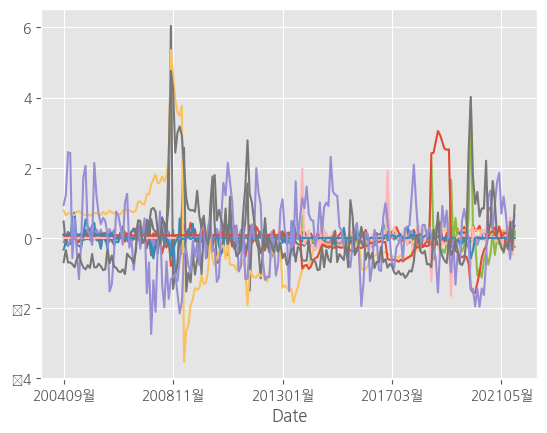

In [9]:
diff_df_pca.plot(legend=False)
plt.show()

<AxesSubplot:>

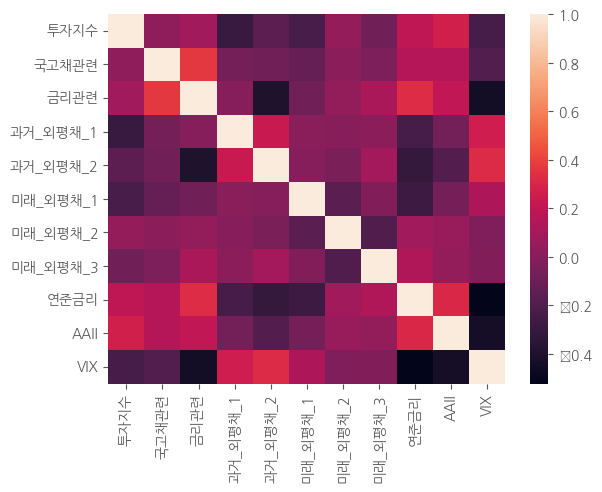

In [10]:
import seaborn as sns

sns.heatmap(diff_df_pca.corr())

In [11]:
## VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(diff_df_pca.values, col) for col in range(diff_df_pca.shape[1])]
vif['Feature'] = diff_df_pca.columns

vif = vif.sort_values(by='VIF_Factor', ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

## VIF 수치도 모두 10 미만으로 변수간 다중공선성 문제는 해결됐다고 판단.

,VIF_Factor,Feature
0,1.841437,VIX
1,1.679730,금리관련
2,1.634741,연준금리
3,1.382894,과거_외평채_2
4,1.332316,AAII
5,1.258754,투자지수
6,1.257739,과거_외평채_1
7,1.215364,국고채관련
8,1.201900,미래_외평채_1
9,1.152273,미래_외평채_3


# VAR Regreesor

In [12]:
new_y_train = pd.DataFrame(y_train).diff(1).dropna()

diff_df_pca['Target'] = new_y_train.values
diff_df_pca

,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3,연준금리,AAII,VIX,Target
Date,,,,,,,,,,,,
200409월,0.088002,-0.329703,-1.123890e-01,4.711286e-01,0.786655,1.199041e-14,-1.332268e-15,0.075974,0.106548,0.937641,-0.688125,0.047854
200410월,0.018264,-0.106283,-4.440892e-16,-1.990318e-01,0.643383,-9.103829e-15,2.553513e-15,0.075974,0.093835,1.220525,-0.345024,-0.011485
200411월,0.171449,-0.171562,-2.379705e-01,8.303769e-02,0.701124,2.886580e-15,-7.771561e-16,0.075974,0.104126,2.444238,-0.699835,0.049768
200412월,0.076876,-0.179664,-4.444561e-02,5.134937e-03,0.708523,-4.440892e-16,9.992007e-16,0.075974,0.135607,2.420399,-0.693980,0.003828
200501월,0.083199,0.631334,2.927856e-02,-6.919807e-02,0.660406,-1.110223e-15,-3.330669e-16,0.075974,0.074463,-0.573327,-0.749016,0.068272
...,...,...,...,...,...,...,...,...,...,...,...,...
202107월,-0.233468,-0.008871,2.175670e-02,0.000000e+00,0.214712,-1.353920e-01,4.198318e-02,0.158905,0.012713,0.683363,-0.114338,-0.199711
202108월,-0.022924,-0.058104,1.614496e-01,2.220446e-16,0.214712,-9.177373e-02,2.560235e-02,0.126700,-0.003027,-0.038946,-0.320433,-0.083585
202109월,-0.323998,0.176802,1.840614e-01,0.000000e+00,0.214712,1.425974e-01,5.773272e-01,-0.117054,-0.008475,-0.597563,0.459331,-0.183121


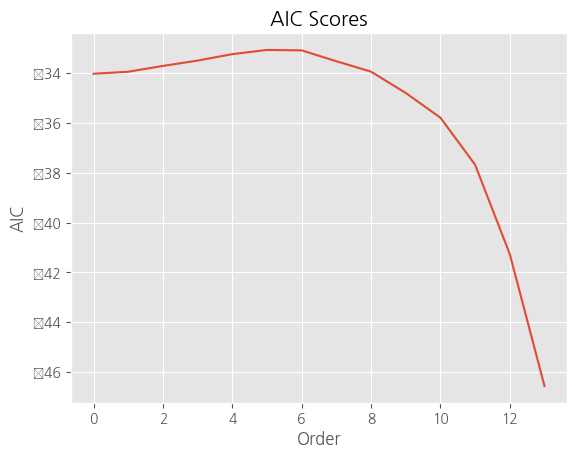

최소 AIC 값 : p = -46.55555351120843
최적의 p 값 : 14


14

In [13]:
from VAR_reg import VARModel


VARMODEL = VARModel(df = diff_df_pca)
min_p = VARMODEL.find_p()
min_p
## p=14 일때 제일 적합

In [14]:
fitted_model = VARMODEL.train(p = min_p)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 21, Nov, 2022
Time:                     17:14:28
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -12.2719
Nobs:                     193.000    HQIC:                  -32.6718
Log likelihood:           3234.35    FPE:                6.25480e-16
AIC:                     -46.5556    Det(Omega_mle):     3.29912e-19
--------------------------------------------------------------------
Results for equation 투자지수
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.076781         0.057503           -1.335           0.182
L1.투자지수             -0.973757         0.673429           -1.446           0.148
L1.국고채관련            -0.245042         0.197331           -1.242  

In [15]:
temp = pd.DataFrame(pca_X_train.iloc[-1, :]).T
pca_X_test = pd.concat([temp, pca_X_test], axis=0)
pca_X_test = pca_X_test.diff(1).dropna()
pca_X_test

,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3,연준금리,AAII,VIX
202112월,0.359253,-0.206969,0.137564,-2.220446e-16,4.718448e-16,-0.195253,0.014042,-0.037588,0.000000,-1.419189,-1.167597
202201월,-0.607718,0.375201,0.246425,0.000000e+00,0.000000e+00,0.395339,-0.229256,-0.136924,0.000605,-0.940829,0.891243
202202월,0.028190,0.306539,0.060111,0.000000e+00,0.000000e+00,0.446557,-0.157041,0.146816,0.000000,-0.256265,0.622968
202203월,0.004657,0.145874,0.009076,0.000000e+00,0.000000e+00,0.336236,-0.083665,0.147265,0.072041,0.710786,-1.123099
202204월,-0.240024,0.739770,0.200425,0.000000e+00,0.000000e+00,0.357707,0.000196,0.172536,0.079306,-1.400118,1.503672
202205월,0.003318,0.135669,0.264265,0.000000e+00,0.000000e+00,0.378066,-0.122284,0.105162,0.259105,0.168856,-0.844286
202206월,-0.858344,0.575458,0.201902,0.000000e+00,0.000000e+00,0.120886,0.014004,0.024104,0.259711,0.017084,0.294973
202207월,0.300109,-0.363028,0.505407,0.000000e+00,0.000000e+00,0.235970,-0.083524,-0.038576,0.282715,0.592786,-0.864076
202208월,-0.037906,0.041524,0.406243,0.000000e+00,0.000000e+00,-0.118529,0.215339,0.195085,0.409241,0.927717,0.531631
202209월,-0.845821,0.875530,0.215515,0.000000e+00,0.000000e+00,0.121819,-0.023437,-0.001328,0.151347,-2.041773,0.673321


In [16]:
fin_df = VARMODEL.forecast(fitted_model=fitted_model,train_df = diff_df_pca,
                            test_df = pca_X_test, min_p=min_p, step=SPLIT)
fin_df

,0,1,2,3,4,5,6,7,8,9,10,Target_preds
202112월,-0.834071,-0.374694,-0.393676,1.151068,1.550179,0.889456,-0.976544,1.020246,-0.071889,2.687625,2.265717,-0.394181
202201월,-0.617592,-0.305290,-0.294629,-0.294942,1.470671,2.242707,0.528042,1.277605,-0.046025,1.820270,1.327557,-0.300866
202202월,-1.105857,-0.896234,-0.783802,0.489941,0.747890,1.053376,0.709934,0.042811,-0.004770,-2.814154,3.270112,-0.738938
202203월,0.294517,-0.730340,-0.293789,0.753066,0.192495,0.934571,0.222631,0.202166,0.113477,-2.853952,2.365502,0.252397
202204월,-0.304452,0.026861,-0.144775,-0.537024,0.607360,-0.318318,0.394574,0.645297,0.250731,-0.318660,1.397160,-0.142958
202205월,0.380552,-0.200470,-0.333716,-0.261911,0.239636,0.291264,-1.079170,1.135882,0.144953,1.172451,1.811667,0.287928
202206월,0.025333,-0.309590,-0.193443,-0.252661,-1.841046,-0.914279,-0.804402,1.567786,0.329990,2.000077,0.733086,-0.029124
202207월,0.135178,0.059801,0.113955,-1.496623,-1.641173,-0.721739,0.060182,1.511943,0.468293,-1.080550,-0.809563,0.084105
202208월,0.306815,-0.390836,-0.014307,-1.416819,-1.617504,-0.275381,0.042436,1.712948,0.445455,-1.407547,-0.841409,0.235629
202209월,0.433694,-0.400869,0.034066,1.327700,-1.846140,-0.239742,-0.674272,1.333581,0.377058,-1.222305,-0.243695,0.316139


In [17]:
temp_y = diff_df_pca.iloc[-1, -1]

diff_y_test = pd.DataFrame(y_test).diff(1).dropna().values
diff_y_test = [i[0] for i in diff_y_test]
diff_y_test.insert(0, temp_y)

diff_y_test = np.array(diff_y_test)
diff_y_test


array([-0.05933898, -0.39431711,  0.01531329,  0.00255221, -0.18184527,
       -0.00255221, -0.65272881,  0.23544177,  0.        , -0.23544177])

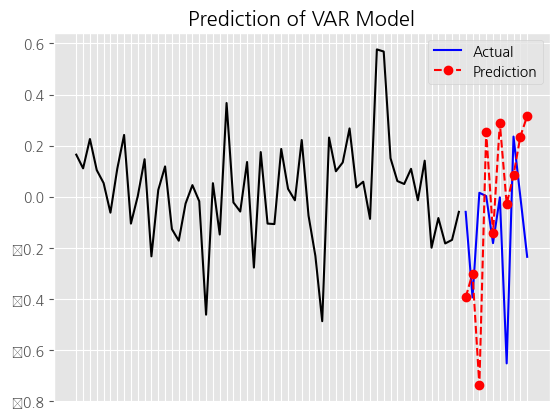

In [22]:
plt.plot(diff_df_pca['Target'][150:], color='black')
plt.plot(fin_df.index, diff_y_test, label = 'Actual', color='blue')
plt.plot(fin_df.index, fin_df['Target_preds'], label = 'Prediction', linestyle='dashed', marker='o', color='red')
plt.tick_params(bottom=False,labelbottom=False)
plt.title('Prediction of VAR Model')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error as mse

mse(y_true=diff_y_test, y_pred=fin_df['Target_preds'])

0.16096080159679305

In [19]:
g_matrix = VARMODEL.grangers_causation_matrix(data=diff_df_pca, variables=diff_df_pca.columns)
g_matrix

,투자지수_x,국고채관련_x,금리관련_x,과거_외평채_1_x,과거_외평채_2_x,미래_외평채_1_x,미래_외평채_2_x,미래_외평채_3_x,연준금리_x,AAII_x,VIX_x,Target_x
투자지수_y,1.0000,0.2958,0.0123,0.3532,0.2158,0.0044,0.1031,0.0195,0.2568,0.0992,0.0012,0.0125
국고채관련_y,0.0000,1.0000,0.0018,0.0000,0.0000,0.5245,0.2609,0.4876,0.0022,0.0362,0.0103,0.0014
금리관련_y,0.0003,0.0024,1.0000,0.0000,0.0016,0.5467,0.7605,0.3236,0.0000,0.0047,0.0000,0.0054
과거_외평채_1_y,0.1635,0.0001,0.0029,1.0000,0.0000,0.9538,0.8437,0.8726,0.0000,0.0157,0.0093,0.3717
과거_외평채_2_y,0.0022,0.0000,0.0000,0.0000,1.0000,0.9978,0.9092,0.8217,0.0000,0.1470,0.0002,0.2001
미래_외평채_1_y,0.0069,0.5447,0.1126,0.9561,0.9285,1.0000,0.0005,0.0018,0.0021,0.0568,0.0001,0.0012
미래_외평채_2_y,0.1496,0.2298,0.7634,0.8833,0.5179,0.0984,1.0000,0.0107,0.7969,0.0765,0.5582,0.1350
미래_외평채_3_y,0.0539,0.7516,0.5454,0.9371,0.6283,0.0002,0.0258,1.0000,0.4250,0.2817,0.3220,0.0074
연준금리_y,0.0169,0.0197,0.0012,0.0704,0.1891,0.2769,0.0780,0.0000,1.0000,0.0109,0.0000,0.0037
AAII_y,0.0332,0.2257,0.0154,0.4763,0.1222,0.2901,0.1015,0.3534,0.0112,1.0000,0.0476,0.0176


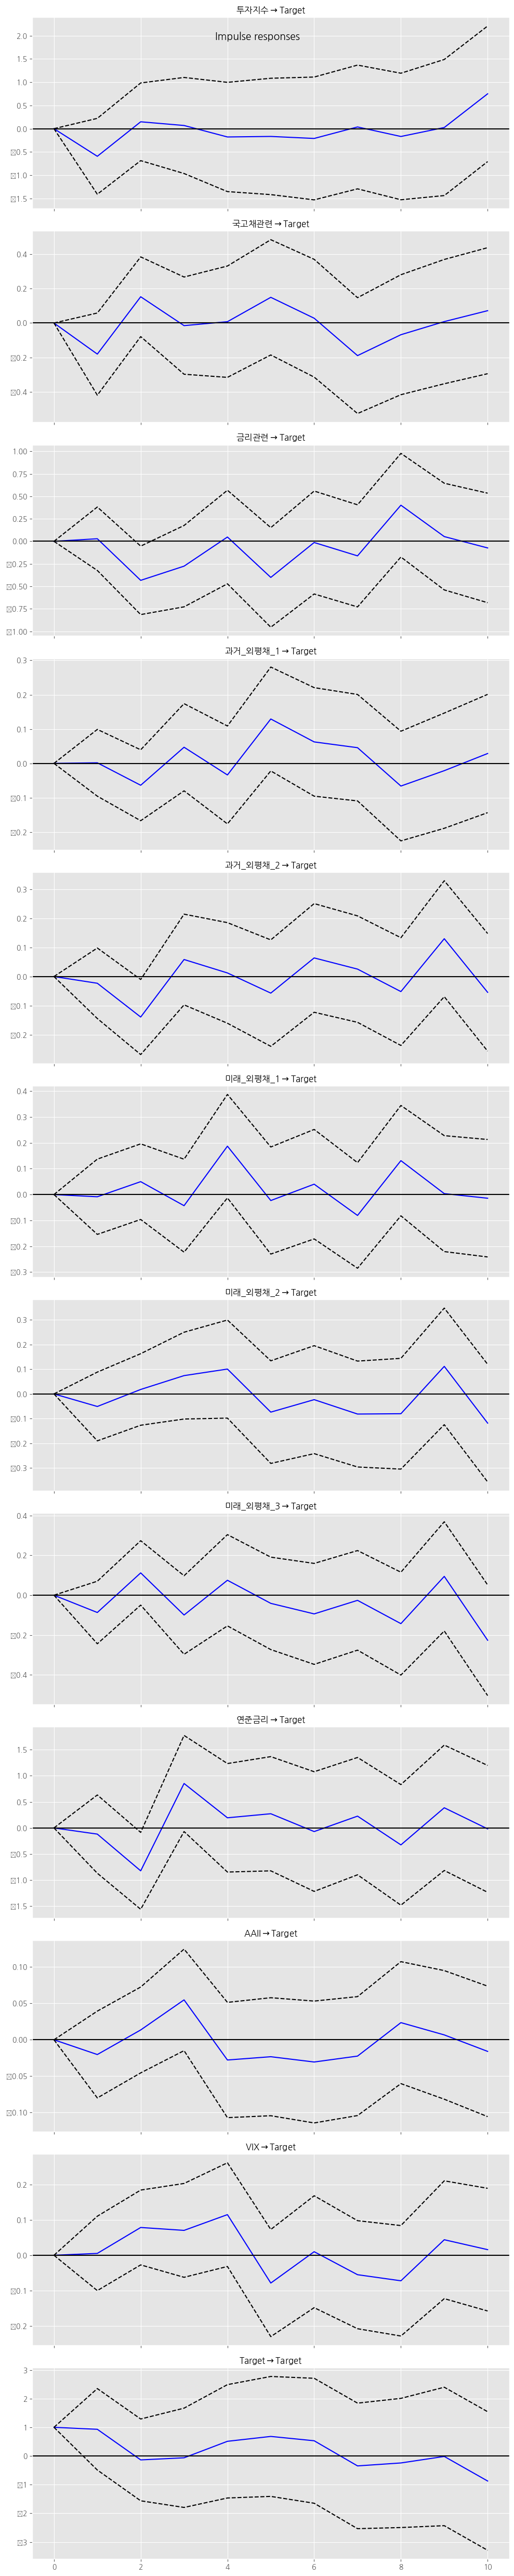

In [20]:
VARMODEL.plot_impulse(fitted_model=fitted_model, num=10)

# ML Regressor

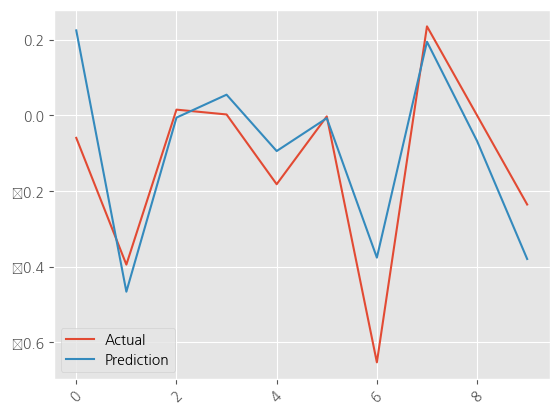

In [23]:
from ML_reg import xgb

model = xgb(X_train=diff_df_pca.drop(['Target'], axis=1), y_train=diff_df_pca['Target'],
            X_test=pca_X_test, y_test=diff_y_test)

preds, fitted_model = model.train(Regressor='x')

model.plot_preds(preds=preds)

In [24]:
pca_X_test.index

Index(['202112월', '202201월', '202202월', '202203월', '202204월', '202205월',
       '202206월', '202207월', '202208월', '202209월'],
      dtype='object')

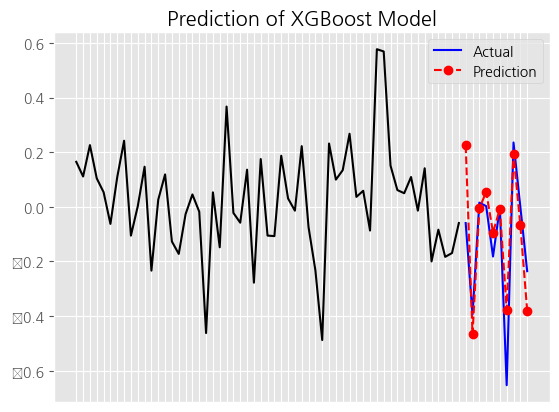

In [34]:
plt.plot(diff_df_pca['Target'][150:], color='black')
plt.plot(pca_X_test.index, diff_y_test, label = 'Actual', color='blue')
plt.plot(pca_X_test.index, preds, label = 'Prediction', linestyle='dashed', marker='o', color='red')
plt.tick_params(bottom=False,labelbottom=False)
plt.title('Prediction of XGBoost Model')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

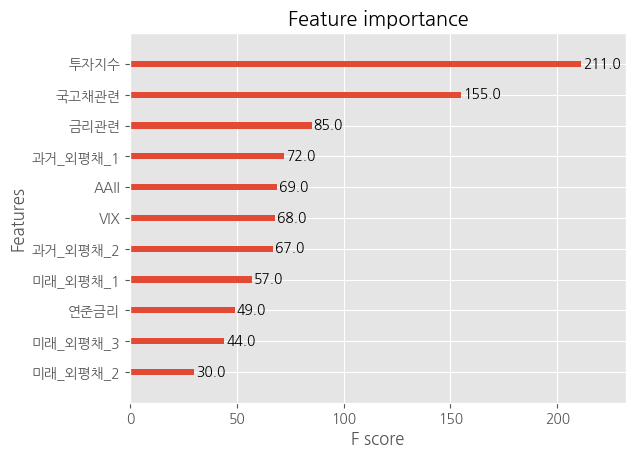

In [26]:
from xgboost import plot_importance

plot_importance(fitted_model)

In [27]:
diff_df_pca

,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3,연준금리,AAII,VIX,Target
Date,,,,,,,,,,,,
200409월,0.088002,-0.329703,-1.123890e-01,4.711286e-01,0.786655,1.199041e-14,-1.332268e-15,0.075974,0.106548,0.937641,-0.688125,0.047854
200410월,0.018264,-0.106283,-4.440892e-16,-1.990318e-01,0.643383,-9.103829e-15,2.553513e-15,0.075974,0.093835,1.220525,-0.345024,-0.011485
200411월,0.171449,-0.171562,-2.379705e-01,8.303769e-02,0.701124,2.886580e-15,-7.771561e-16,0.075974,0.104126,2.444238,-0.699835,0.049768
200412월,0.076876,-0.179664,-4.444561e-02,5.134937e-03,0.708523,-4.440892e-16,9.992007e-16,0.075974,0.135607,2.420399,-0.693980,0.003828
200501월,0.083199,0.631334,2.927856e-02,-6.919807e-02,0.660406,-1.110223e-15,-3.330669e-16,0.075974,0.074463,-0.573327,-0.749016,0.068272
...,...,...,...,...,...,...,...,...,...,...,...,...
202107월,-0.233468,-0.008871,2.175670e-02,0.000000e+00,0.214712,-1.353920e-01,4.198318e-02,0.158905,0.012713,0.683363,-0.114338,-0.199711
202108월,-0.022924,-0.058104,1.614496e-01,2.220446e-16,0.214712,-9.177373e-02,2.560235e-02,0.126700,-0.003027,-0.038946,-0.320433,-0.083585
202109월,-0.323998,0.176802,1.840614e-01,0.000000e+00,0.214712,1.425974e-01,5.773272e-01,-0.117054,-0.008475,-0.597563,0.459331,-0.183121


In [28]:
pca_X_test

,투자지수,국고채관련,금리관련,과거_외평채_1,과거_외평채_2,미래_외평채_1,미래_외평채_2,미래_외평채_3,연준금리,AAII,VIX
202112월,0.359253,-0.206969,0.137564,-2.220446e-16,4.718448e-16,-0.195253,0.014042,-0.037588,0.000000,-1.419189,-1.167597
202201월,-0.607718,0.375201,0.246425,0.000000e+00,0.000000e+00,0.395339,-0.229256,-0.136924,0.000605,-0.940829,0.891243
202202월,0.028190,0.306539,0.060111,0.000000e+00,0.000000e+00,0.446557,-0.157041,0.146816,0.000000,-0.256265,0.622968
202203월,0.004657,0.145874,0.009076,0.000000e+00,0.000000e+00,0.336236,-0.083665,0.147265,0.072041,0.710786,-1.123099
202204월,-0.240024,0.739770,0.200425,0.000000e+00,0.000000e+00,0.357707,0.000196,0.172536,0.079306,-1.400118,1.503672
202205월,0.003318,0.135669,0.264265,0.000000e+00,0.000000e+00,0.378066,-0.122284,0.105162,0.259105,0.168856,-0.844286
202206월,-0.858344,0.575458,0.201902,0.000000e+00,0.000000e+00,0.120886,0.014004,0.024104,0.259711,0.017084,0.294973
202207월,0.300109,-0.363028,0.505407,0.000000e+00,0.000000e+00,0.235970,-0.083524,-0.038576,0.282715,0.592786,-0.864076
202208월,-0.037906,0.041524,0.406243,0.000000e+00,0.000000e+00,-0.118529,0.215339,0.195085,0.409241,0.927717,0.531631
202209월,-0.845821,0.875530,0.215515,0.000000e+00,0.000000e+00,0.121819,-0.023437,-0.001328,0.151347,-2.041773,0.673321


In [29]:
from eli5.sklearn import PermutationImportance
from eli5 import show_weights
from xgboost import XGBRegressor

pi_model = XGBRegressor().fit(diff_df_pca.drop(['Target'], axis=1), diff_df_pca['Target'])

pi_result = PermutationImportance(pi_model).fit(pca_X_test, diff_y_test)
show_weights(pi_result, top = 10, feature_names = diff_df_pca.drop(['Target'],axis=1).columns.tolist())

Weight,Feature
1.5304 ± 0.9272,투자지수
0.0170 ± 0.0408,AAII
0.0029 ± 0.0029,연준금리
0 ± 0.0000,과거_외평채_1
0 ± 0.0000,과거_외평채_2
-0.0022 ± 0.0032,미래_외평채_3
-0.0037 ± 0.0339,VIX
-0.0097 ± 0.0112,미래_외평채_2
-0.0105 ± 0.0070,국고채관련
-0.0134 ± 0.0206,미래_외평채_1


<AxesSubplot:>

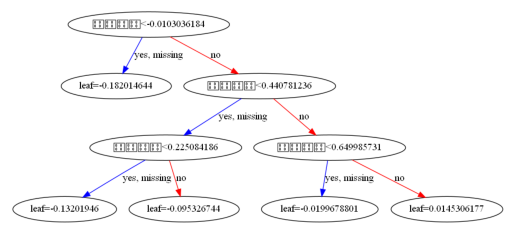

In [30]:
from xgboost import plot_tree

plot_tree(fitted_model)

In [33]:
mse(y_true=diff_y_test, y_pred=preds)

0.020039954699487224

# Retry with Statistic Significant Variables by VAR

유의미했던 변수  
- 연준금리
- 과거_외평채_1
- 금리관련

In [ ]:
selected_X_train = diff_df_pca[['연준금리', '과거_외평채_1','금리관련','Target']]
selected_X_train

In [ ]:
selected_X_test = pca_X_test[['연준금리', '과거_외평채_1','금리관련']]
selected_X_test

In [ ]:
new_VARMODEL = VARModel(df = selected_X_train)
new_min_p = new_VARMODEL.find_p()
new_fitted_model = new_VARMODEL.train(p = 3)

In [ ]:
new_fin_df = new_VARMODEL.forecast(fitted_model=new_fitted_model,train_df = selected_X_train,
                            test_df = selected_X_test, min_p=3, step=SPLIT)
new_fin_df

In [ ]:
plt.plot(diff_df_pca['Target'][150:])
plt.plot(fin_df.index, diff_y_test, label = 'Actual')
plt.plot(fin_df.index, new_fin_df['Target_preds'], label = 'Prediction')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from ML_reg import xgb

new_model = xgb(X_train=selected_X_train.drop(['Target'], axis=1), y_train=selected_X_train['Target'],
            X_test=selected_X_test, y_test=diff_y_test)

new_preds, new_fitted_model = new_model.train(Regressor='x')

model.plot_preds(preds=new_preds)

In [ ]:
plt.plot(diff_df_pca['Target'][150:])
plt.plot(pca_X_test.index, diff_y_test, label = 'Actual')
plt.plot(pca_X_test.index, new_preds, label = 'Prediction', linestyle='dashed', marker='o')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Retry with Important Variables by ML Model

선정 변수
- 투자지수
- 국고채관련
- AAII
- VIX

In [ ]:
ml_selected_X_train = diff_df_pca[['투자지수', '국고채관련','AAII','VIX','Target']]
ml_selected_X_test = pca_X_test[['투자지수', '국고채관련','AAII','VIX']]


In [ ]:
new_VARMODEL = VARModel(df = ml_selected_X_train)
new_min_p = new_VARMODEL.find_p()
new_fitted_model = new_VARMODEL.train(p = new_min_p)

In [ ]:
new_fin_df = new_VARMODEL.forecast(fitted_model=new_fitted_model,train_df = ml_selected_X_train,
                            test_df = ml_selected_X_test, min_p=new_min_p, step=SPLIT)
new_fin_df

In [ ]:
plt.plot(diff_df_pca['Target'][150:])
plt.plot(fin_df.index, diff_y_test, label = 'Actual')
plt.plot(fin_df.index, new_fin_df['Target_preds'], label = 'Prediction')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from ML_reg import xgb

new_model = xgb(X_train=ml_selected_X_train.drop(['Target'], axis=1), y_train=ml_selected_X_train['Target'],
            X_test=ml_selected_X_test, y_test=diff_y_test)

new_preds, new_fitted_model = new_model.train(Regressor='x')

model.plot_preds(preds=new_preds)

In [ ]:
plt.plot(diff_df_pca['Target'][150:])
plt.plot(pca_X_test.index, diff_y_test, label = 'Actual')
plt.plot(pca_X_test.index, new_preds, label = 'Prediction', linestyle='dashed', marker='o')
plt.xticks(rotation=45)
plt.legend()
plt.show()